# Odd / Even transit test

For a planet system all of the transits are expected to have the same depth. However, in a system where the transit events are caused by two stars orbiting around one another, we often see the odd and the even numbered transits to have different depths. This can sometimes be seen by eye if we plot the odd and the even transit events next to one another (as covered by this notebook). *I note that to truly determine whether the odd and the even transits are the same depths we need to run a full model of the shapes of the transits which we do not cover here.*

General notes:

- You need to run each cell. Do this by either pressing the 'run' button at the top of the page or pressing shift+enter (this is what Nora does in the videos). 

- When you run a cell, a star will appear in the brackets to the left of the cell while the cell is runnning. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a # is ignored by the code, so all comments are shown following # (except in this cell because I made this into a text cell)


*by Nora Eisner*

In [46]:
# This cell simply imports the modules that you need for this work in this notebook

%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np

In [47]:
# define TIC e.g. TIC 284475976 (WASP-48 b)
# make sure to put quotation marks ('' or "") around it (the font should change to red)
# !!! change the TIC id to look at a different target

TIC = 'TIC 35101462' # !! CHANGE THIS for different targets

# search what SPOC data is available for a given target - and chose a sector (in example this is sector 5)
'''
(this is a comment and not code - for longer comments you can use tripple quotation marks)

note, there are a number of ways to select what sectors you want to look at. First check what sectors are available using:

print (lk.search_lightcurve(TIC, author = 'SPOC'))

this will print the available sectors for a given target for you. You can then select them using: 

1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'
2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)
3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')
4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'
5. all of the available data: 'lk.search_lightcurve(TIC, author = 'SPOC')'

''' 
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 4) # !! CHANEG THIS (see above)

lc = sector_data.download()


<IPython.core.display.Javascript object>


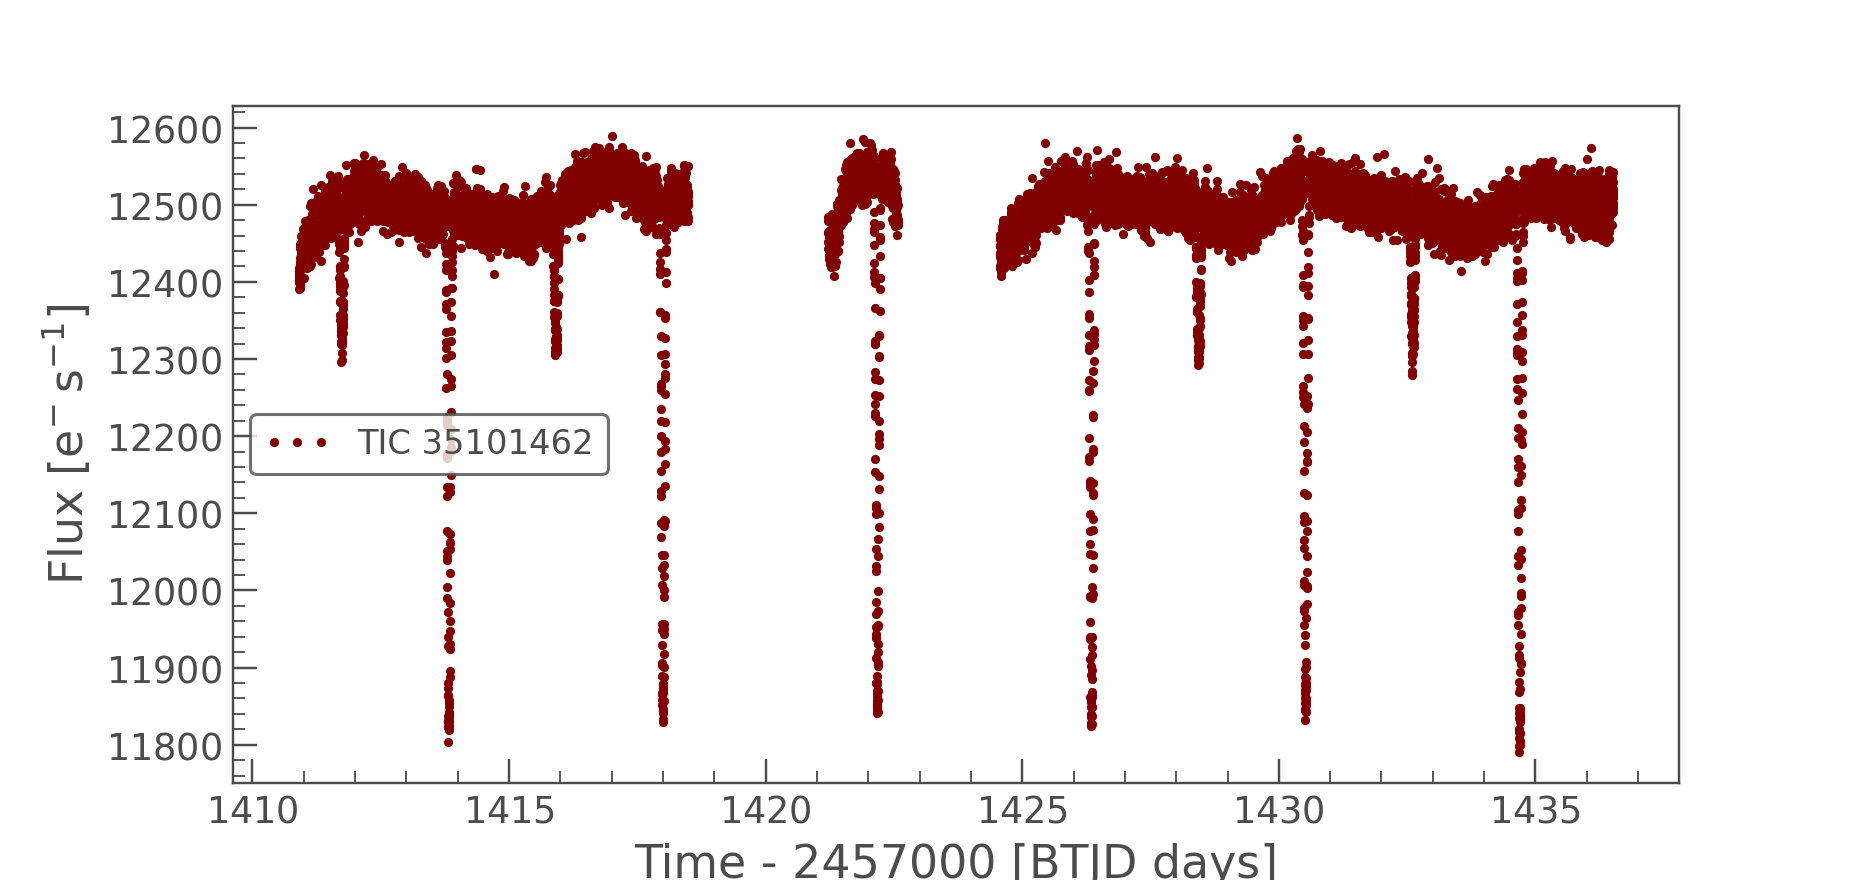

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

In [48]:
# plot the lightcurve to see what it looks like
lc.plot(lw = 0, color = 'maroon', marker = 'o')

In [49]:
def odd_even_phase(lc, period, t0, plot_size = False, same_axes = False, binning = False):
    
    lc = lc.normalize()
    
    if binning != False:
        lc = lc.bin(binning/60/24) # you can change the binning factor here if you like
    time = lc.time.value
    flux = lc.flux.value
    
    t0_odd = t0
    t0_even = t0 + period
    period = period*2
    
    phase_odd = np.array([-0.5+( ( t - t0_odd-0.5*period) % period) / period for t in time])
    phase_even = np.array([-0.5+( ( t - t0_even-0.5*period) % period) / period for t in time])

    if same_axes == False:
        fig, ax = plt.subplots(1,2, figsize = (10,4), sharey = True)
        
        ax[0].plot(phase_odd, flux, lw = 0, color = 'navy', marker = '.', alpha =0.4)
        ax[1].plot(phase_even, flux, lw = 0, color = 'maroon', marker = '.', alpha =0.4)
        
        ax[0].set_xlabel("Phase")
        ax[0].set_ylabel("Normalized flux")
        ax[1].set_xlabel("Phase")
        
        ax[0].annotate("ODD", (0.3, np.nanmin(flux)), fontsize = 14)
        ax[1].annotate("EVEN", (0.3, np.nanmin(flux)), fontsize = 14)
    
        plt.subplots_adjust(wspace=0.02)
        
        if plot_size != False:
            ax[0].set_xlim(-plot_size, plot_size)
            ax[1].set_xlim(-plot_size, plot_size)
    else:
        fig, ax = plt.subplots(figsize = (4,4))
        
        ax.plot(phase_odd, flux, lw = 0, color = 'navy', marker = '.', alpha =0.4, label = 'odd')
        ax.plot(phase_even, flux, lw = 0, color = 'maroon', marker = '.', alpha =0.4, label = 'even')
        
        ax.set_xlabel("Phase")
        ax.set_ylabel("Normalized flux")
        
        plt.legend()
            
        if plot_size != False:
            ax.set_xlim(-plot_size, plot_size)


## Parameters we can change for the plotting: 

- **lc**: the lightcurve extracted using the lightkurve took (required)
- **period**: period of the signal, i.e. time between consecutive dips (required)
- **t0**: time of one of the transit-events (required)
- **plot_size**: ± x axis limits (to zoom in on the time of the transit)
- **same_axes**: plot the odd and even transits on the same figure
- **binning**: number of minutes you want to bin the data to


<IPython.core.display.Javascript object>


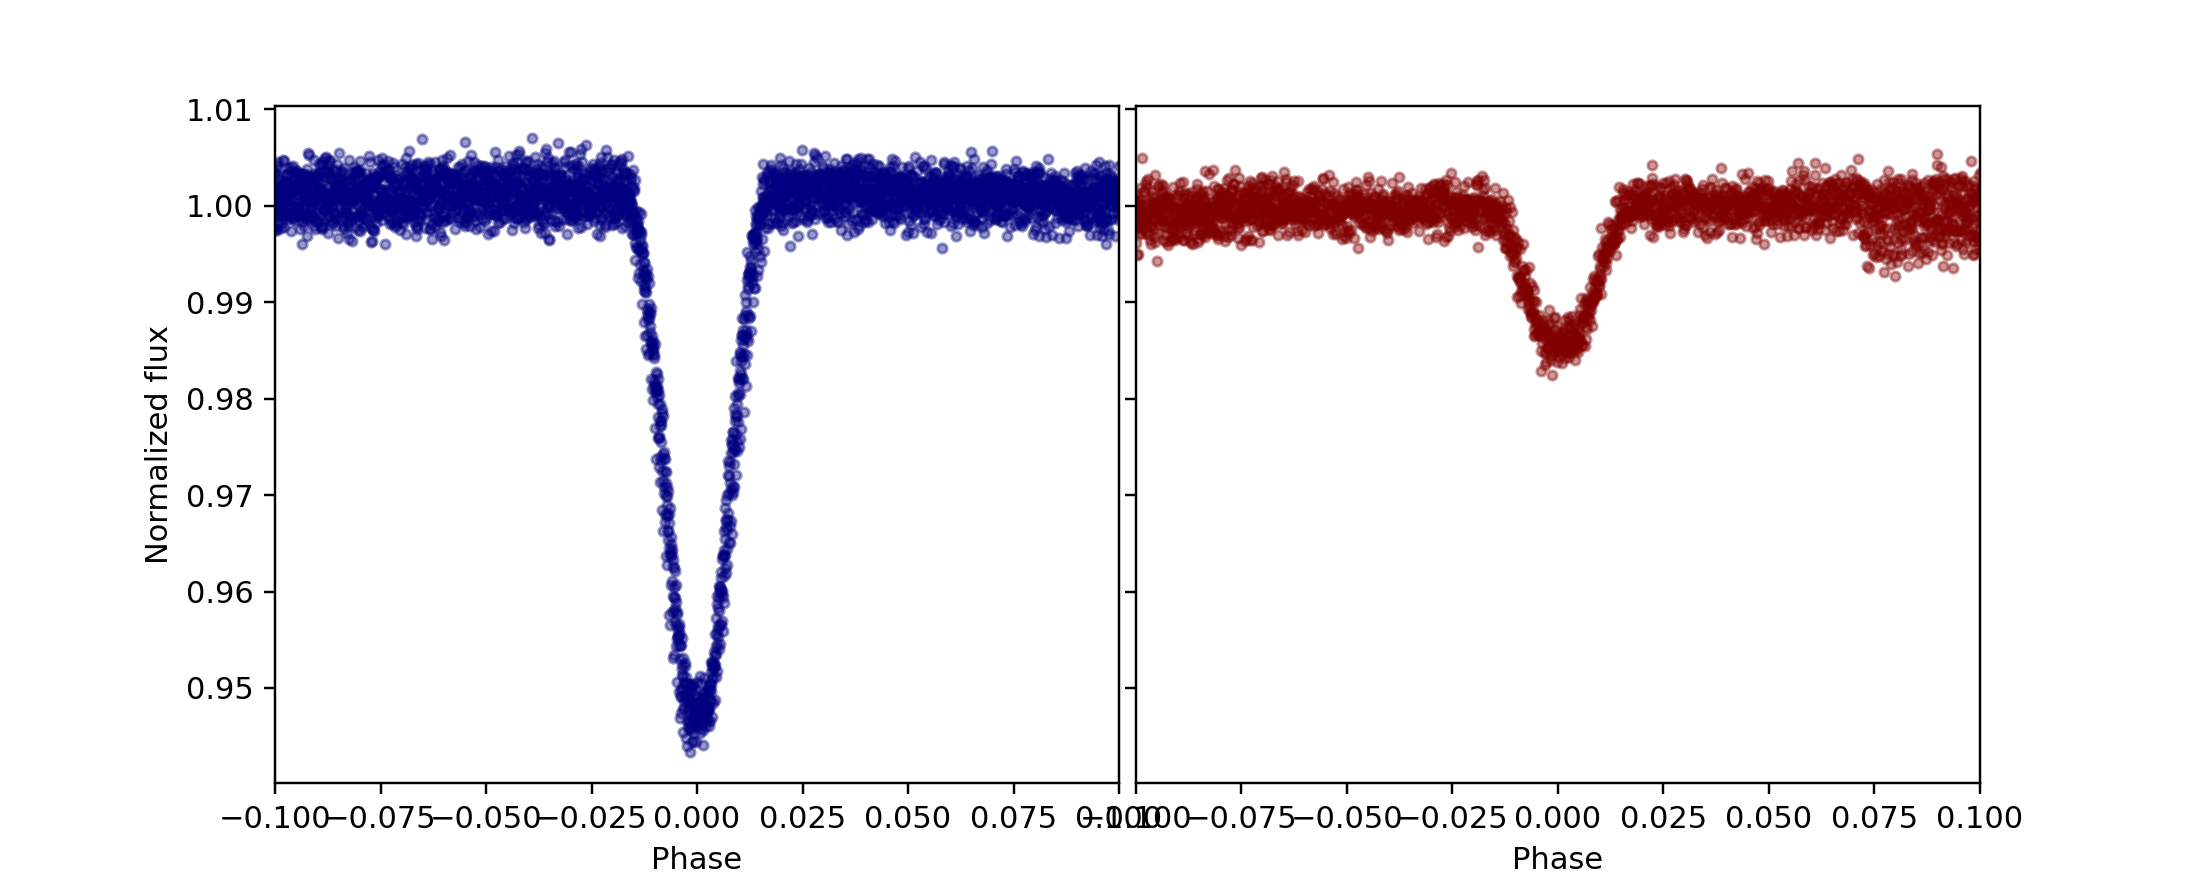

In [51]:
period = 2.08699075
t0 = 1413.823652

odd_even_phase(lc, period, t0, plot_size = 0.1)

In [52]:
# let's try for a second example
TIC = 'TIC 50365310' # !! CHANGE THIS for different targets

# search what SPOC data is available for a given target - and chose a sector (in example this is sector 5)
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 34) # !! CHANEG THIS (see above)

lc = sector_data.download()


In [55]:
period = 2.1713483871574
t0 = 2229.630046 

odd_even_phase(lc, period, t0, plot_size = 0.05,  same_axes = True, binning = 15)

<IPython.core.display.Javascript object>